In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('data/zeel/NSE-ZEEL-EQ_2.csv')
data

,DATE,OPEN,HIGH,LOW,CLOSE,JAW,TEETHS,LIPS,MA5,MA15,VROC
0,'2024-07-01 09:48:00',152.08,152.12,152.00,152.00,151.67,151.46,151.96,152.08,151.84,62.02
1,'2024-07-01 09:49:00',152.00,152.01,151.95,152.01,151.65,151.47,151.98,152.06,151.88,154.34
2,'2024-07-01 09:50:00',152.00,152.00,151.87,152.00,151.63,151.49,151.98,152.02,151.93,-93.42
3,'2024-07-01 09:51:00',152.00,152.05,151.94,152.00,151.61,151.51,151.97,152.00,151.95,-62.87
4,'2024-07-01 09:52:00',152.05,152.15,152.00,152.03,151.60,151.54,151.98,152.01,151.98,161.92
...,...,...,...,...,...,...,...,...,...,...,...
25461,'2024-10-07 15:24:00',126.17,126.25,125.91,125.94,126.33,126.29,125.99,126.11,125.86,33.13
25462,'2024-10-07 15:25:00',126.00,126.00,125.84,125.90,126.33,126.21,126.01,126.09,125.86,-7.16
25463,'2024-10-07 15:26:00',125.90,125.95,125.80,125.94,126.34,126.15,125.99,126.05,125.87,-17.70
25464,'2024-10-07 15:27:00',125.95,125.95,125.90,125.95,126.34,126.08,125.97,126.00,125.88,-18.80


In [10]:
data.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'JAW', 'TEETHS', 'LIPS', 'MA5',
       'MA15', 'VROC'],
      dtype='object')

In [11]:
data = data.to_numpy()
data = data[:, 1:] # removing the dates column

In [12]:
## print(data.shape)
data[1021:1024]

array([[151.95, 151.95, 151.85, 151.92, 151.79, 151.69, 151.79, 151.89,
        151.74, -31.87],
       [151.9, 151.97, 151.85, 151.91, 151.78, 151.68, 151.82, 151.91,
        151.76, -24.68],
       [151.97, 151.99, 151.74, 151.87, 151.77, 151.67, 151.83, 151.91,
        151.77, 31.04]], dtype=object)

In [13]:
X, y = [], []

In [14]:
X, y = [], []
last_candles_count = 8
next_candles_count = 3

for idx, row in enumerate(data[last_candles_count-1 : 
    -(next_candles_count+1)]):
    idx = idx + last_candles_count + 1
    first_open = data[idx-last_candles_count-1][0]
    first_jaw = data[idx-last_candles_count-1][4]
    first_lip = data[idx-last_candles_count-1][6]
    first_teeth = data[idx-last_candles_count-1][5]
    first_ma5 = data[idx-last_candles_count-1][7]
    first_ma15 = data[idx-last_candles_count-1][8]
    first_volumn_change = data[idx-last_candles_count-1][9]
    last_candles = []
    for candle in data[idx-last_candles_count : idx]:
        temp = []
        temp.append(round(candle[0]-first_open, 2))
        temp.append(round(candle[1]-first_open, 2))
        temp.append(round(candle[2]-first_open, 2))
        temp.append(round(candle[3]-first_open, 2))
        temp.append(round(candle[4]-first_jaw, 2))
        temp.append(round(candle[5]-first_teeth, 2))
        temp.append(round(candle[6]-first_lip, 2))
        temp.append(round(candle[7]-first_ma5, 2))
        temp.append(round(candle[8]-first_ma15, 2))
        temp.append(round(candle[9]-first_volumn_change, 2))
        
        last_candles.append(temp)
    X.append(last_candles)
    next_candles = []
    for candle in data[idx: idx+next_candles_count]:
        temp = []
        temp.append(round(candle[0]-first_open, 2))
        
        next_candles.append(temp[0])
    y.append(next_candles)

In [15]:
print("data:\n", data[:8])
print("-1 data:\n", data[-1])
print("\nX:", X[0])
print("\ny:", y[0])
print("X.shape:", np.array(X).shape, "y.shape:", np.array(y).shape)

data:
 [[152.08 152.12 152.0 152.0 151.67 151.46 151.96 152.08 151.84 62.02]
 [152.0 152.01 151.95 152.01 151.65 151.47 151.98 152.06 151.88 154.34]
 [152.0 152.0 151.87 152.0 151.63 151.49 151.98 152.02 151.93 -93.42]
 [152.0 152.05 151.94 152.0 151.61 151.51 151.97 152.0 151.95 -62.87]
 [152.05 152.15 152.0 152.03 151.6 151.54 151.98 152.01 151.98 161.92]
 [152.03 152.15 152.02 152.1 151.58 151.57 152.0 152.03 152.0 -41.08]
 [152.15 152.15 152.0 152.15 151.56 151.61 152.01 152.06 152.02 41.15]
 [152.15 152.15 151.98 151.98 151.54 151.65 152.03 152.05 152.04 66.57]]
-1 data:
 [125.95 126.25 125.91 126.15 126.35 126.03 125.96 125.98 125.91 -11.34]

X: [[-0.08, -0.07, -0.13, -0.07, -0.02, 0.01, 0.02, -0.02, 0.04, 92.32], [-0.08, -0.08, -0.21, -0.08, -0.04, 0.03, 0.02, -0.06, 0.09, -155.44], [-0.08, -0.03, -0.14, -0.08, -0.06, 0.05, 0.01, -0.08, 0.11, -124.89], [-0.03, 0.07, -0.08, -0.05, -0.07, 0.08, 0.02, -0.07, 0.14, 99.9], [-0.05, 0.07, -0.06, 0.02, -0.09, 0.11, 0.04, -0.05, 0.16, -1

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Input, Flatten
from sklearn.model_selection import train_test_split

In [17]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.05, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24182, 8, 10), (24182, 3), (1273, 8, 10), (1273, 3))

In [18]:
model = Sequential()
model.add(Input(shape=(last_candles_count, 10)))
model.add(LSTM(200, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(next_candles_count))
# model.add(Reshape((3, 11)))
model.compile(optimizer='adam', loss='mse')

In [19]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.3072 - val_loss: 0.1836
Epoch 2/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1443 - val_loss: 0.1701
Epoch 3/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1532 - val_loss: 0.1728
Epoch 4/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1604 - val_loss: 0.1694
Epoch 5/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1415 - val_loss: 0.1723
Epoch 6/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1189 - val_loss: 0.1662
Epoch 7/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1292 - val_loss: 0.1543
Epoch 8/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1612 - val_loss: 0.1428
Epoch 9/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1113 - val_loss: 0.1506
Epoch 10/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.1202 - val_loss: 0.1433
Epoch 11/500
605/605 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1304 - val_loss: 0.1370
Epoch 12/500
605/605 ━━━━━━━━━

KeyboardInterrupt: 

In [47]:
X.shape, y.shape

(TensorShape([1012, 8, 10]), TensorShape([1012, 3]))

In [48]:
y_pred = model.predict(X[0:1])
y_pred, [0.15, 0.01, 0.35]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(array([[0.8282571, 1.71667  , 1.5830607]], dtype=float32), [0.15, 0.01, 0.35])

In [49]:
y_pred = model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[-7.88946092e-01, -7.91840672e-01, -6.75027966e-01],
       [-3.86456251e-02, -3.48816216e-02,  1.32481903e-02],
       [ 2.64462769e-01,  2.71503836e-01,  2.87514240e-01],
       [-3.67360115e-01, -3.80656987e-01, -3.75989169e-01],
       [ 1.85706109e-01,  9.84920785e-02,  2.11138874e-02],
       [-3.69980693e-01, -4.36031669e-01, -3.97099763e-01],
       [-8.25330913e-02, -1.12938285e-01, -8.20605159e-02],
       [ 2.67791152e-01,  2.78442770e-01,  2.90961564e-01],
       [-2.04530045e-01, -2.69524276e-01, -3.89950842e-01],
       [-5.28753102e-01, -4.89333719e-01, -3.48670095e-01],
       [ 2.67738998e-01,  2.77060151e-01,  2.15688348e-01],
       [ 1.15259908e-01, -1.65479034e-02, -5.89291751e-03],
       [-3.01612914e-03,  2.41725147e-03,  1.20215714e-02],
       [-2.86759079e-01, -2.23453671e-01, -1.79943651e-01],
       [-5.14568448e-01, -6.62356019e-01, -6.22666359e-01],
       [-2.98903108e-01, -2.52737582e-01, -1.90480381e-01],
       [-5.04367471e-01, -4.37543422e-01

In [50]:
for y_p, y_t in zip(y_pred, y_test):
    print("\n", (y_t[0]-y_p[0]), "\t", (y_t[1]-y_p[1]), "\t", (y_t[2]-y_p[2]))


 0.018946111 	 0.34184068 	 0.19502798

 0.08864562 	 -0.085118376 	 -0.12324819

 -0.014462769 	 -0.19150384 	 -0.27751425

 -0.26263988 	 -0.369343 	 -0.36401084

 -0.18570611 	 -0.19849208 	 0.078886114

 -0.3200193 	 -0.3439683 	 -0.50290024

 -0.11746691 	 -0.0070617124 	 -0.14793949

 0.40220886 	 0.051557243 	 -0.020961553

 -0.12546997 	 -0.00047573447 	 0.15995084

 0.028753102 	 0.19933373 	 -0.10132989

 -0.067738995 	 -0.027060151 	 -0.05568835

 -0.2352599 	 -0.1534521 	 -0.29410708

 0.09301613 	 0.0075827483 	 -0.012021571

 0.06675908 	 0.003453672 	 0.049943656

 -0.6754316 	 -0.447644 	 -0.86733365

 -0.1010969 	 -0.1672624 	 -0.24951962

 -0.23563254 	 0.047543436 	 0.26251268

 -0.020057745 	 0.06772652 	 0.09555966

 0.2106997 	 0.19120565 	 0.1088576

 -0.113206096 	 -0.031419497 	 -0.008383064

 0.44318116 	 0.31116992 	 0.25353044

 -0.0026073065 	 0.14244644 	 0.17886543

 1.779769 	 2.046293 	 1.1811217

 0.085112646 	 0.114870965 	 -0.08858709

 0.07516144 	

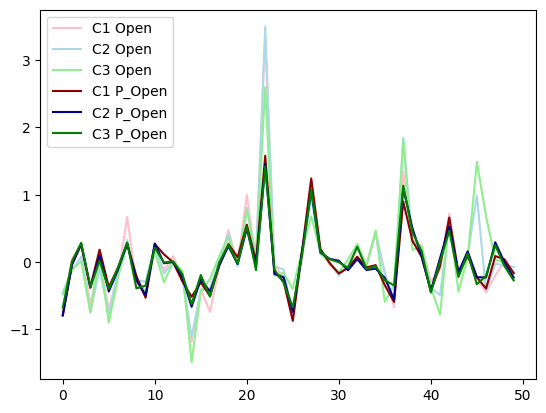

In [51]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y_test[:50, 0], label='C1 Open', color="pink")
plt.plot(y_test[:50, 1], label='C2 Open', color="lightblue")
plt.plot(y_test[:50, 2], label='C3 Open', color="lightgreen")
plt.plot(y_pred[:50, 0], label='C1 P_Open', color="darkred")
plt.plot(y_pred[:50, 1], label='C2 P_Open', color="darkblue")
plt.plot(y_pred[:50, 2], label='C3 P_Open', color="green")
plt.legend()
plt.show()

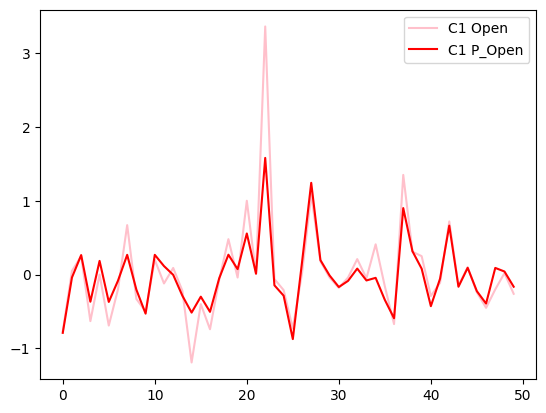

In [52]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
plt.plot(y_test[:50, 0], label='C1 Open', color="pink")
# plt.plot(y[0:5, 1], label='C2 Open', color="blue")
# plt.plot(y[0:5, 2], label='C3 Open', color="green")
plt.plot(y_pred[:50, 0], label='C1 P_Open', color="red")
# plt.plot(y_pred[0:5, 1], label='C2 P_Open', color="darkblue")
# plt.plot(y_pred[0:5, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

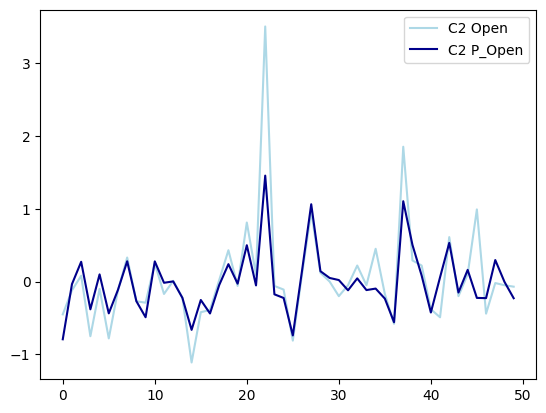

In [53]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
# plt.plot(y[0:5, 0], label='C1 Open', color="red")
plt.plot(y_test[:50, 1], label='C2 Open', color="lightblue")
# plt.plot(y[0:5, 2], label='C3 Open', color="green")
# plt.plot(y_pred[0:5, 0], label='C1 P_Open', color="darkred")
plt.plot(y_pred[:50, 1], label='C2 P_Open', color="darkblue")
# plt.plot(y_pred[0:5, 2], label='C3 P_Open', color="darkgreen")
plt.legend()
plt.show()

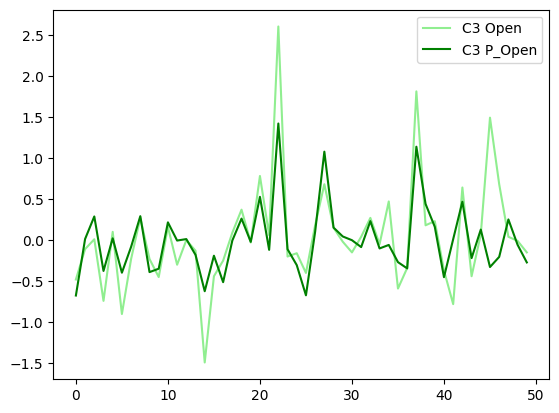

In [54]:
import matplotlib.pyplot as plt

# Example for the first feature (e.g., Close price)
# plt.plot(y[0:5, 0], label='C1 Open', color="red")
# plt.plot(y[0:5, 1], label='C2 Open', color="blue")
plt.plot(y_test[:50, 2], label='C3 Open', color="lightgreen")
# plt.plot(y_pred[0:5, 0], label='C1 P_Open', color="darkred")
# plt.plot(y_pred[0:5, 1], label='C2 P_Open', color="darkblue")
plt.plot(y_pred[:50, 2], label='C3 P_Open', color="green")
plt.legend()
plt.show()

In [55]:
y[0:5], y_pred[0:5]

(<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
 array([[0.71, 1.65, 1.52],
        [1.66, 1.53, 1.5 ],
        [1.5 , 1.47, 1.6 ],
        [1.5 , 1.63, 2.14],
        [1.62, 2.13, 3.76]], dtype=float32)>,
 array([[-0.7889461 , -0.7918407 , -0.67502797],
        [-0.03864563, -0.03488162,  0.01324819],
        [ 0.26446277,  0.27150384,  0.28751424],
        [-0.36736012, -0.380657  , -0.37598917],
        [ 0.18570611,  0.09849208,  0.02111389]], dtype=float32))

In [56]:
model.save("07OCT.keras")